In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
%matplotlib inline

t检验检查两组均值是否不同，但是如果我们想比较的是多个组的均值呢？如果我们分布对任意两组进行t检验，那么出现false positives可能性就会增加， 因此我们用ANOVA进行多组比较。

http://baike.baidu.com/link?url=ZARfL7bR2giK0MtGGcVuDRCNpjCTYVkLXnrgHO47L95V-M0Xsb8NZmRu-0OQ02vEQG6T6St-2eUFEUwhAEkCex-tMsnMXpewvGiI25bsnHSP3tGnT-t92QVAeEBJwZhpPbfr1y0s2IVBWGuP0cWWb2dStHzWH60EiiIsJf6yFe_

### 单因素方差分析(one-way ANOVA)

单因素方差分析 （one-way ANOVA），用于完全随机设计的多个样本均值间的比较，其统计推断是推断各样本所代表的各总体均值是否相等。

In [3]:
np.random.seed(12)
occupation = ["teacher","doctor","police","engineer","farmer"] 
 
occupation_surveyed = np.random.choice(a= occupation, p = [0.05, 0.15 ,0.25, 0.05, 0.5], size=1000)
occupation_salary = stats.poisson.rvs(loc=1000, mu=5000, size=1000) 

occupation_frame = pd.DataFrame({"occupation":occupation_surveyed,"salary":occupation_salary})
groups = occupation_frame.groupby("occupation").groups 

teacher = occupation_salary[groups["teacher"]] 
doctor = occupation_salary[groups["doctor"]] 
police = occupation_salary[groups["police"]] 
engineer = occupation_salary[groups["engineer"]] 
farmer = occupation_salary[groups["farmer"]] 
# ANOVA 使用f statistic
stats.f_oneway(teacher,doctor,police,engineer,farmer)

F_onewayResult(statistic=1.5632226988817401, pvalue=0.18195623367052671)

In [8]:
np.random.seed(12)
occupation = ["teacher","doctor","police","engineer","farmer"] 

occupation_surveyed = np.random.choice(a= occupation, p = [0.05, 0.15 ,0.25, 0.05, 0.5], size=1000)
doctor_salary = stats.poisson.rvs(loc=1000, mu=5300, size=1000) 
occupation_salary = stats.poisson.rvs(loc=1000, mu=5000, size=1000) 
occupation_salary=np.where(occupation_surveyed=='doctor',doctor_salary,occupation_salary)

occupation_frame = pd.DataFrame({"occupation":occupation_surveyed,"salary":occupation_salary})
groups = occupation_frame.groupby("occupation").groups 

teacher = occupation_salary[groups["teacher"]] 
doctor = occupation_salary[groups["doctor"]] 
police = occupation_salary[groups["police"]] 
engineer = occupation_salary[groups["engineer"]] 
farmer = occupation_salary[groups["farmer"]] 

stats.f_oneway(teacher,doctor,police,engineer,farmer)

F_onewayResult(statistic=549.09170650043848, pvalue=5.300894444455738e-250)

In [11]:
# 两量比较
salary_pairs = []
for i in range(4): 
    for j in range(i+1,5): 
        salary_pairs.append((occupation[i], occupation[j])) 

for occupation1, occupation2 in salary_pairs:
    print(occupation1, occupation2)
    print(stats.ttest_ind(occupation_salary[groups[occupation1]],occupation_salary[groups[occupation2]]))

teacher doctor
Ttest_indResult(statistic=-25.255879708706377, pvalue=1.7666958019684808e-62)
teacher police
Ttest_indResult(statistic=0.10138228657965127, pvalue=0.91931803569152359)
teacher engineer
Ttest_indResult(statistic=-0.19170818593634736, pvalue=0.84839328034210038)
teacher farmer
Ttest_indResult(statistic=-0.155725848608219, pvalue=0.87630554063137844)
doctor police
Ttest_indResult(statistic=39.38920537009394, pvalue=7.9536844129633176e-138)
doctor engineer
Ttest_indResult(statistic=25.091398401148108, pvalue=5.7549615242100805e-63)
doctor farmer
Ttest_indResult(statistic=46.63650979729028, pvalue=4.5515353748840878e-211)
police engineer
Ttest_indResult(statistic=-0.36519996716083153, pvalue=0.71522652440185186)
police farmer
Ttest_indResult(statistic=-0.53295372032500377, pvalue=0.59422203324218559)
engineer farmer
Ttest_indResult(statistic=0.14053306712992175, pvalue=0.88828909194451944)


比较次数越多那么越可能出现false positive.这时一种方法是调整置信度，比如10次比较，那我的p就用0.05/10。通常可以采用Bonferroni correction.还有一种就是使用Tukey test( pairwise_tukeyhsd()))


group1,group2,meandiff,lower,upper,reject
doctor,engineer,-303.2605,-335.933,-270.5881,True
doctor,farmer,-304.7508,-323.4129,-286.0888,True
doctor,police,-307.7622,-328.5988,-286.9255,True
doctor,teacher,-306.4742,-340.7687,-272.1797,True
engineer,farmer,-1.4903,-31.0519,28.0713,False
engineer,police,-4.5016,-35.482,26.4787,False
engineer,teacher,-3.2136,-44.4657,38.0384,False
farmer,police,-3.0113,-18.5215,12.4988,False
farmer,teacher,-1.7233,-33.0684,29.6217,False
police,teacher,1.288,-31.3984,33.9745,False


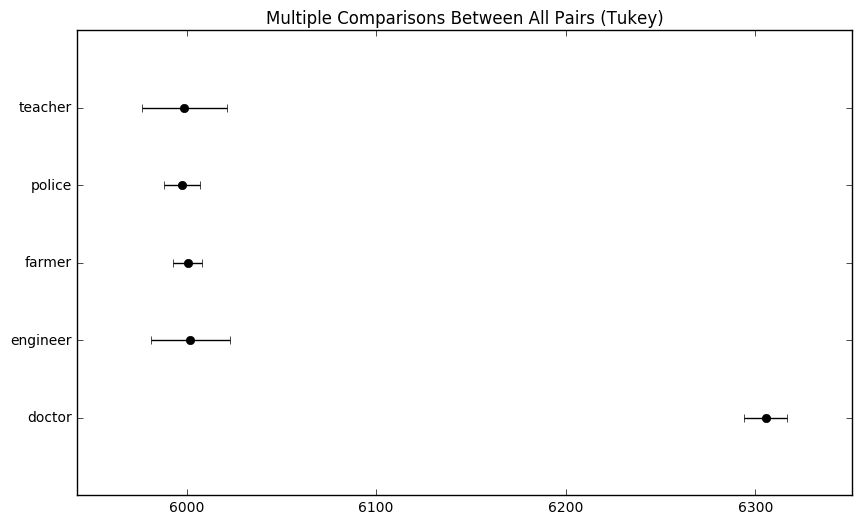

In [9]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=occupation_salary, # Data 
                          groups=occupation_surveyed, # Groups 
                          alpha=0.05) # Significance level 
tukey.plot_simultaneous() # Plot group confidence intervals 
tukey.summary()